In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px
import seaborn as sns

In [17]:
files = os.listdir('./')
for file in files:
    if file.endswith(".csv"):
        file_name = file

file_name

'data_05-03-2022.csv'

In [18]:
df = pd.read_csv(file_name)
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Area
0,USA,80895639.0,45686.0,983486.0,1454.0,54344934.0,207970.0,25567219.0,6693.0,242027.0,2942.0,955780795.0,2859549.0,3.342418e+08,North America
1,India,42957128.0,5572.0,514908.0,288.0,42367984.0,914.0,74236.0,8944.0,30626.0,367.0,770973356.0,549658.0,1.402643e+09,Asia
2,Brazil,28974315.0,68101.0,651343.0,697.0,26909481.0,99195.0,1413491.0,8318.0,134714.0,3028.0,63776166.0,296522.0,2.150808e+08,South America
3,France,22958320.0,57789.0,139123.0,181.0,21483323.0,118431.0,1335874.0,2484.0,350431.0,2124.0,246629975.0,3764506.0,6.551456e+07,Europe
4,UK,19119181.0,44740.0,162008.0,110.0,17537214.0,NaN,1419959.0,264.0,279189.0,2366.0,485037295.0,7082788.0,6.848113e+07,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Samoa,33.0,NaN,NaN,NaN,28.0,NaN,5.0,NaN,164.0,NaN,NaN,NaN,2.006140e+05,Australia/Oceania
217,Vatican City,29.0,NaN,NaN,NaN,28.0,NaN,1.0,NaN,36070.0,NaN,NaN,NaN,8.040000e+02,Europe
218,Vanuatu,18.0,NaN,1.0,NaN,6.0,NaN,11.0,NaN,56.0,3.0,23000.0,72075.0,3.191120e+05,Australia/Oceania
219,Western Sahara,10.0,NaN,1.0,NaN,8.0,NaN,1.0,NaN,16.0,2.0,NaN,NaN,6.218230e+05,Africa


In [19]:
df.describe()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotCases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population
count,2.210000e+02,155.000000,215.000000,104.000000,2.130000e+02,133.000000,2.130000e+02,164.000000,221.000000,215.000000,2.110000e+02,2.110000e+02,2.210000e+02
mean,2.007711e+06,10605.490323,27949.758140,76.057692,1.757921e+06,12933.210526,2.771231e+05,438.237805,124561.524887,1109.800000,2.795114e+07,1.777338e+06,3.567938e+07
std,7.032571e+06,31684.854355,96889.309285,185.986785,5.679041e+06,33478.201668,1.795772e+06,1255.314117,131138.958312,1176.236757,1.012197e+08,3.095760e+06,1.403605e+08
min,1.000000e+01,1.000000,1.000000,1.000000,6.000000e+00,1.000000,1.000000e+00,1.000000,16.000000,2.000000,2.358000e+03,5.111000e+03,8.040000e+02
25%,2.402000e+04,46.500000,268.000000,3.000000,1.566400e+04,72.000000,6.770000e+02,6.000000,10735.000000,168.500000,3.441215e+05,1.371840e+05,6.281990e+05
50%,1.633380e+05,425.000000,2195.000000,13.500000,1.255360e+05,912.000000,9.025000e+03,40.000000,83023.000000,714.000000,2.003534e+06,7.078940e+05,6.540822e+06
75%,1.001754e+06,5587.000000,13736.000000,57.500000,9.182840e+05,6424.000000,8.132500e+04,221.000000,199267.000000,1784.500000,1.165907e+07,1.883654e+06,2.388872e+07
max,8.089564e+07,266838.000000,983486.000000,1454.000000,5.434493e+07,207970.000000,2.556722e+07,8944.000000,696256.000000,6251.000000,9.557808e+08,2.158103e+07,1.439324e+09


### Tình hình Covid thế giới

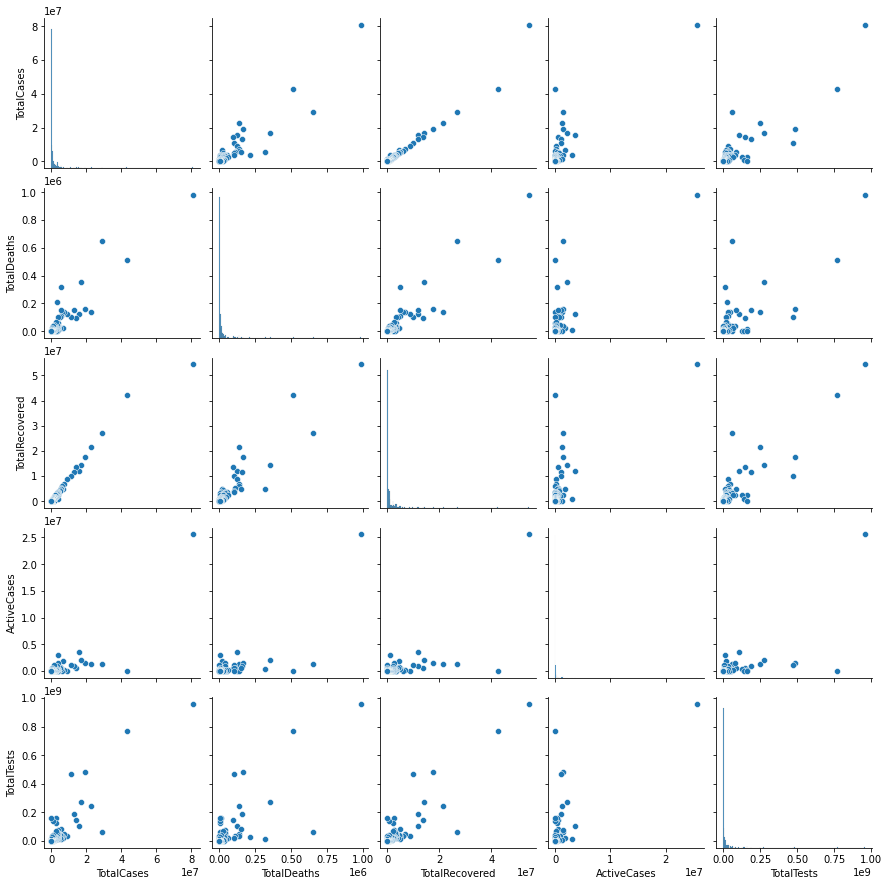

In [20]:
col = ['TotalCases','TotalDeaths','TotalRecovered','ActiveCases', 'TotalTests']
sns.pairplot(df[col]);

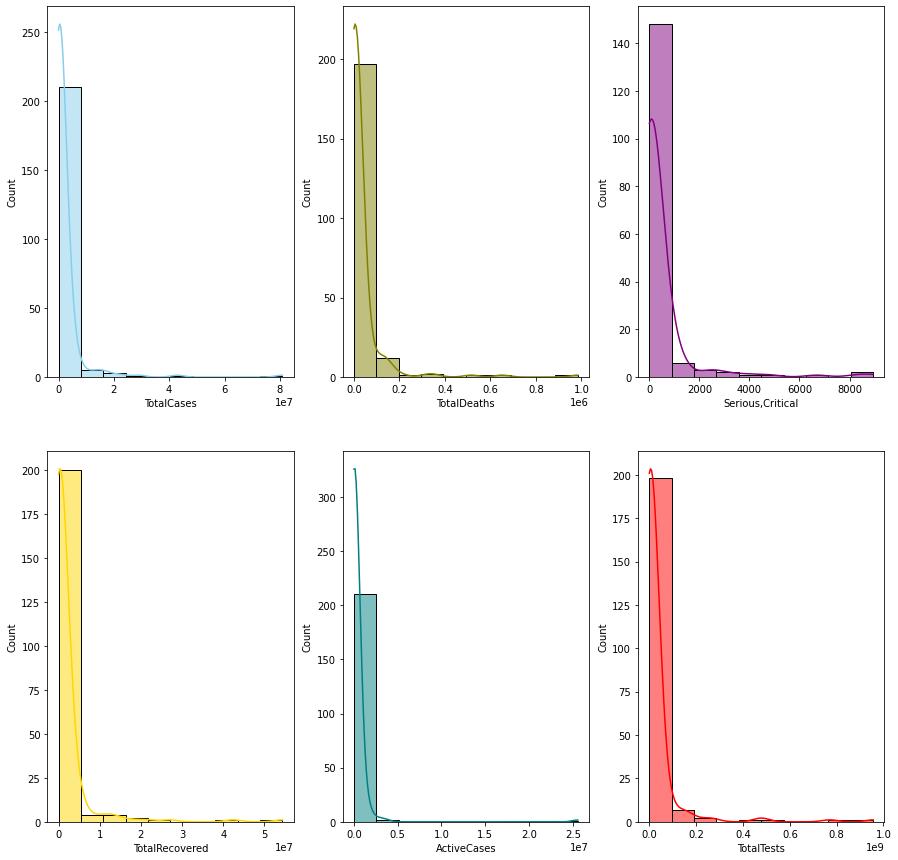

In [21]:
fig, axs = plt.subplots(2, 3, figsize=(15, 15))

sns.histplot(data=df, x="TotalCases", kde=True, color="skyblue", ax=axs[0, 0], bins=10)
sns.histplot(data=df, x="TotalDeaths", kde=True, color="olive", ax=axs[0, 1], bins=10)
sns.histplot(data=df, x="TotalRecovered", kde=True, color="gold", ax=axs[1, 0], bins=10)
sns.histplot(data=df, x="ActiveCases", kde=True, color="teal", ax=axs[1, 1], bins=10)
sns.histplot(data=df, x="Serious,Critical", kde=True, color="purple", ax=axs[0, 2], bins=10)
sns.histplot(data=df, x="TotalTests", kde=True, color="red", ax=axs[1, 2], bins=10);

### Số ca nhiễm theo từng khu vực trên thế giới

In [22]:
df_groupedby = df.groupby('Area')[['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases']].sum()
# fig, axs = plt.subplots(2, 2, figsize=(15, 15))

fig = px.line_polar(r=df_groupedby['TotalCases'], theta=df_groupedby.index, line_close=True)
fig.update_traces(fill='toself')
fig.show()

fig = px.line_polar(r=df_groupedby['TotalDeaths'], theta=df_groupedby.index, line_close=True)
fig.update_traces(fill='toself')
fig.show()

### Tình hình Covid ở các khu vực

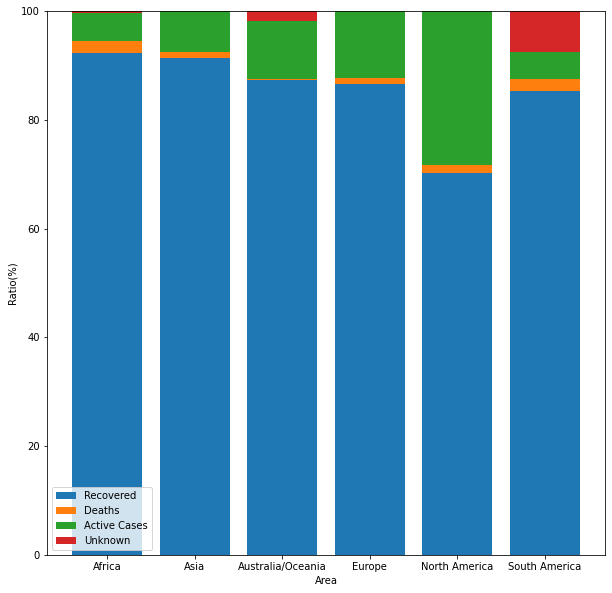

In [23]:
plt.figure(figsize=(10,10))

totalDeaths = df_groupedby['TotalDeaths']
totalRecovered = df_groupedby['TotalRecovered']
totalActiveCases = df_groupedby['ActiveCases']
totalCases = df_groupedby['TotalCases']

DeathsRatio = (totalDeaths/totalCases) * 100
RecoveredRatio = (totalRecovered/totalCases) * 100
ActiveCasesRatio = (totalActiveCases/totalCases) * 100
Unknown = 100 - (DeathsRatio+RecoveredRatio+ActiveCasesRatio)

plt.xlabel('Area')
plt.ylabel('Ratio(%)')


p1 = plt.bar(df_groupedby.index,RecoveredRatio,label='Recovered')
p2 = plt.bar(df_groupedby.index,DeathsRatio, bottom = RecoveredRatio, label = 'Deaths')
p3 = plt.bar(df_groupedby.index,ActiveCasesRatio, bottom = RecoveredRatio+DeathsRatio, label = 'Active Cases')
p3 = plt.bar(df_groupedby.index,Unknown, bottom = RecoveredRatio+DeathsRatio+ActiveCasesRatio, label = 'Unknown')
plt.legend();

### Tình hình Covid ở VN

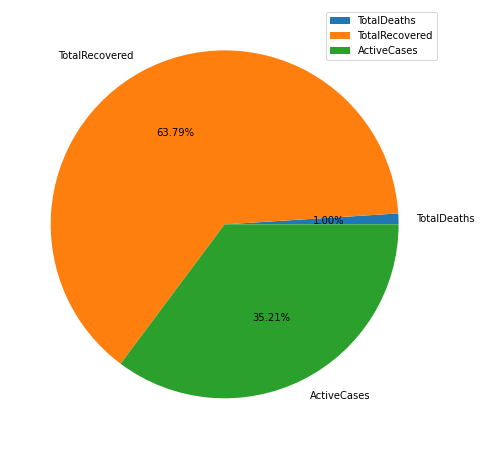

In [24]:
col = ['TotalDeaths','TotalRecovered','ActiveCases']
dataOfVn = df[df['Country,Other']=='Vietnam'][col]
fig = plt.figure(figsize=(8,8))
fig.patch.set_facecolor('white')
plt.pie(dataOfVn.values[0],labels = col,autopct="%1.2f%%")
plt.legend();